In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from scipy import stats
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix,roc_auc_score
import warnings
warnings.filterwarnings('ignore')



## Deliverable 1

In [4]:
bank_seed_data=pd.read_csv(r"C:\Users\bchandran\OneDrive\Ensemble Techniques & Model Tuning\Week-3 Project\bank-full.csv")
bank_seed_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# print('shape:',bank_seed_data.shape)
print('-------------data types of variables---------------')
print(bank_seed_data.info())
print('------------------description of variables------------------')
print(bank_seed_data.describe().T) # description happened only for numericals


-------------data types of variables---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
------------------description of variables------------------
            count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.

In [6]:
# since there are lot of object types convert as much as possible
bank_data_imp=bank_seed_data.copy()# copy df for imputation
bank_data_imp['balance'].mask(bank_data_imp['balance']<0,0,inplace=True) # imputation to replace negatives with zero
bank_data_imp['Target'].replace("yes",1,inplace=True)
bank_data_imp['Target'].replace("no",0,inplace=True)
bank_data_imp['default'].replace("no",0,inplace=True)
bank_data_imp['default'].replace("yes",1,inplace=True)
bank_data_imp['loan'].replace("no",0,inplace=True)
bank_data_imp['loan'].replace("yes",1,inplace=True)
bank_data_imp['housing'].replace("no",0,inplace=True)
bank_data_imp['housing'].replace("yes",1,inplace=True)
bank_data_imp['pdays'].mask(bank_data_imp['pdays']<0,0,inplace=True) # imputation to replace negatives with zero
bank_data_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null int64
balance      45211 non-null int64
housing      45211 non-null int64
loan         45211 non-null int64
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null int64
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


In [7]:
print(bank_data_imp['month'].value_counts())
# month column needs to be treated

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


In [8]:
replace_month={'month': {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12},
               'poutcome': {'success':1,'failure':0,'other':3,'unknown':4} 
              
              }
bank_data_imp = bank_data_imp.replace(replace_month)


In [9]:
bank_data_imp.info()
bank_data_model1 = bank_data_imp.copy() # copy the imputed model to another df
print(bank_data_model1)
print('-----------standard deviation----------------')
print(bank_data_model1.std())
print('---------------IQR--------------')
print(bank_data_model1.quantile(0.75) - bank_data_model1.quantile(0.25))
# -------------------inference -----------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null int64
balance      45211 non-null int64
housing      45211 non-null int64
loan         45211 non-null int64
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null int64
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int64
Target       45211 non-null int64
dtypes: int64(13), object(4)
memory usage: 5.9+ MB
       age           job   marital  education  default  balance  housing  \
0       58    management   married   tertiary        0     2143        1   
1       44    technician    single  secondary        0       29        1   
2       33  entrepreneur   mar

#### 1. Univariate charts

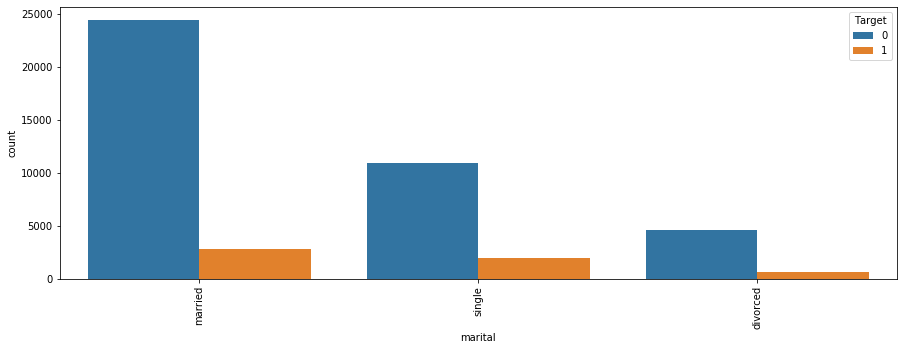

In [10]:
plt.figure(figsize=(15,5))
cnt_plt_chart=sns.countplot(bank_data_model1['marital'],hue=bank_data_model1['Target'])
cnt_plt_chart.set_xticklabels(cnt_plt_chart.get_xticklabels(),rotation=90);

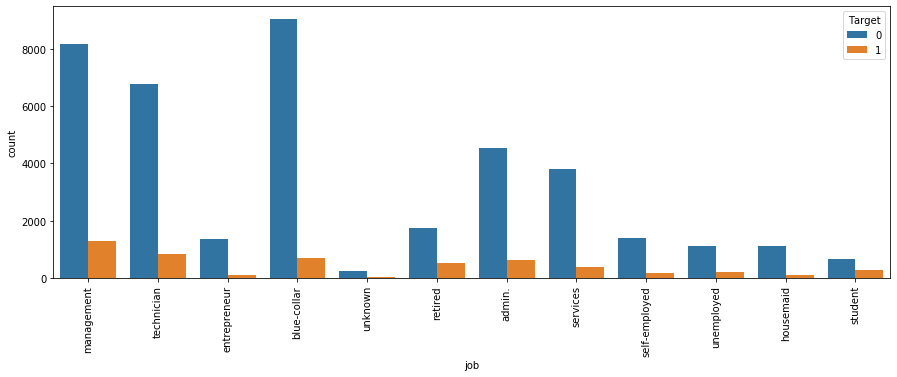

In [11]:
plt.figure(figsize=(15,5))
cnt_plt_chart=sns.countplot(bank_data_model1['job'],hue=bank_data_model1['Target'])
cnt_plt_chart.set_xticklabels(cnt_plt_chart.get_xticklabels(),rotation=90);

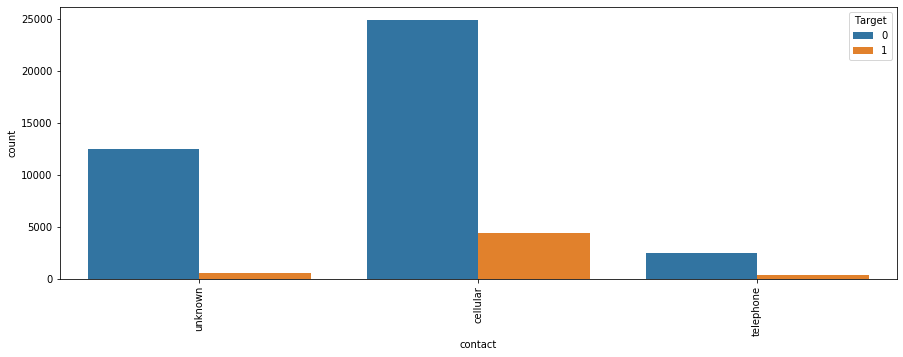

In [12]:
plt.figure(figsize=(15,5))
cnt_plt_chart=sns.countplot(bank_data_model1['contact'],hue=bank_data_model1['Target'])
cnt_plt_chart.set_xticklabels(cnt_plt_chart.get_xticklabels(),rotation=90);

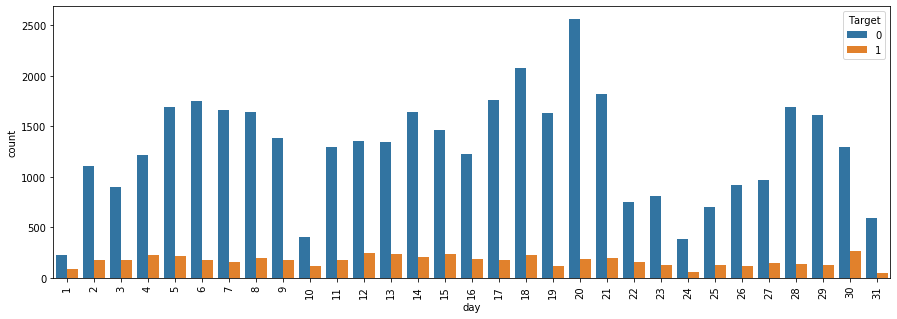

In [13]:
plt.figure(figsize=(15,5))
cnt_plt_chart=sns.countplot(bank_data_model1['day'],hue=bank_data_model1['Target'])
cnt_plt_chart.set_xticklabels(cnt_plt_chart.get_xticklabels(),rotation=90);

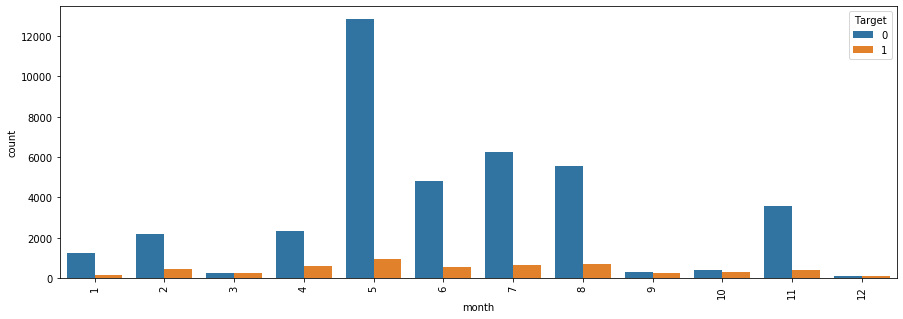

In [14]:
plt.figure(figsize=(15,5))
cnt_plt_chart=sns.countplot(bank_data_model1['month'],hue=bank_data_model1['Target'])
cnt_plt_chart.set_xticklabels(cnt_plt_chart.get_xticklabels(),rotation=90);

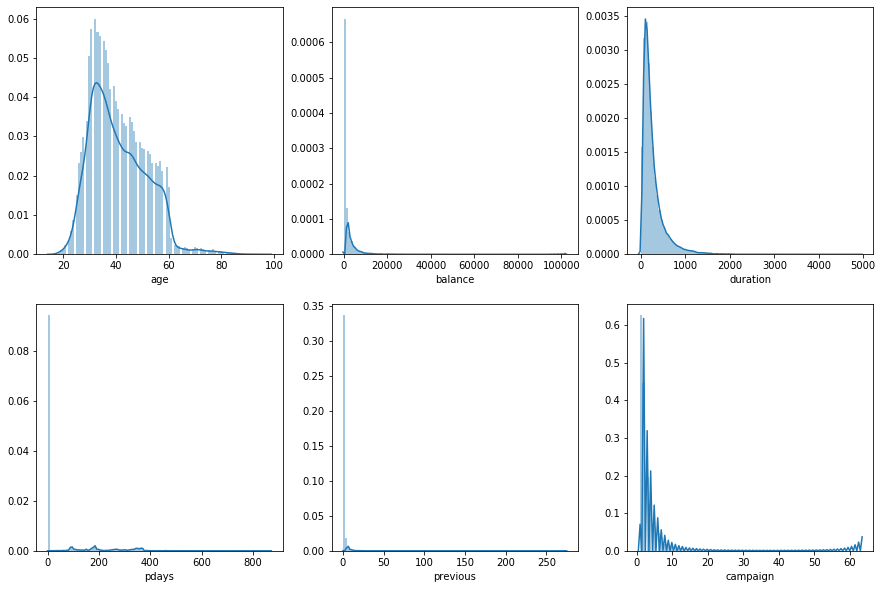

In [15]:
numerical=['age','balance','duration','pdays','previous','campaign']
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for a,subplot in zip(numerical,ax.flatten()):
    sns.distplot(bank_data_model1[a],bins=100,  ax=subplot, kde=True)

#### 2. Multivariate Analysis

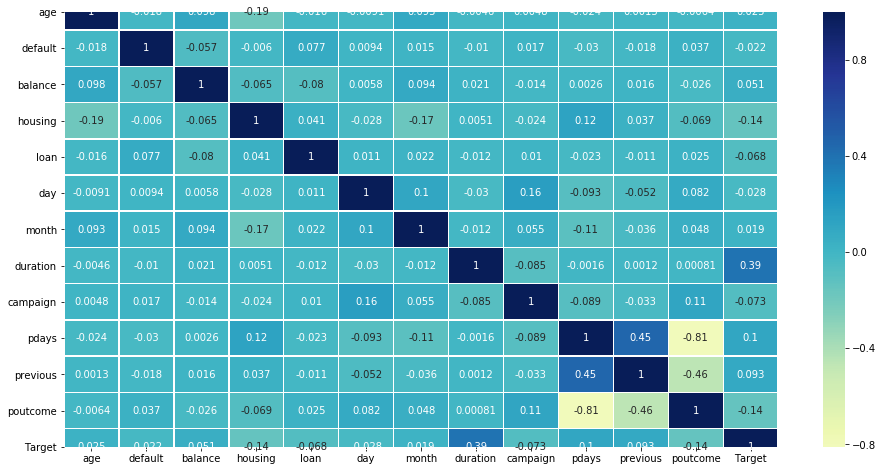

In [16]:
# Correlation method to find relationship between variables
plt.figure(figsize=(16,8))

sns.heatmap(
    bank_data_model1.corr(),
    annot=True,
    linewidths=.5,
    center=0,
    cmap='YlGnBu'
)
plt.show()
# No significant relationship between variables exist. The highest correlation is between 
# 1. duartion and target
# 2. age and balance


In [17]:
bank_data_model1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

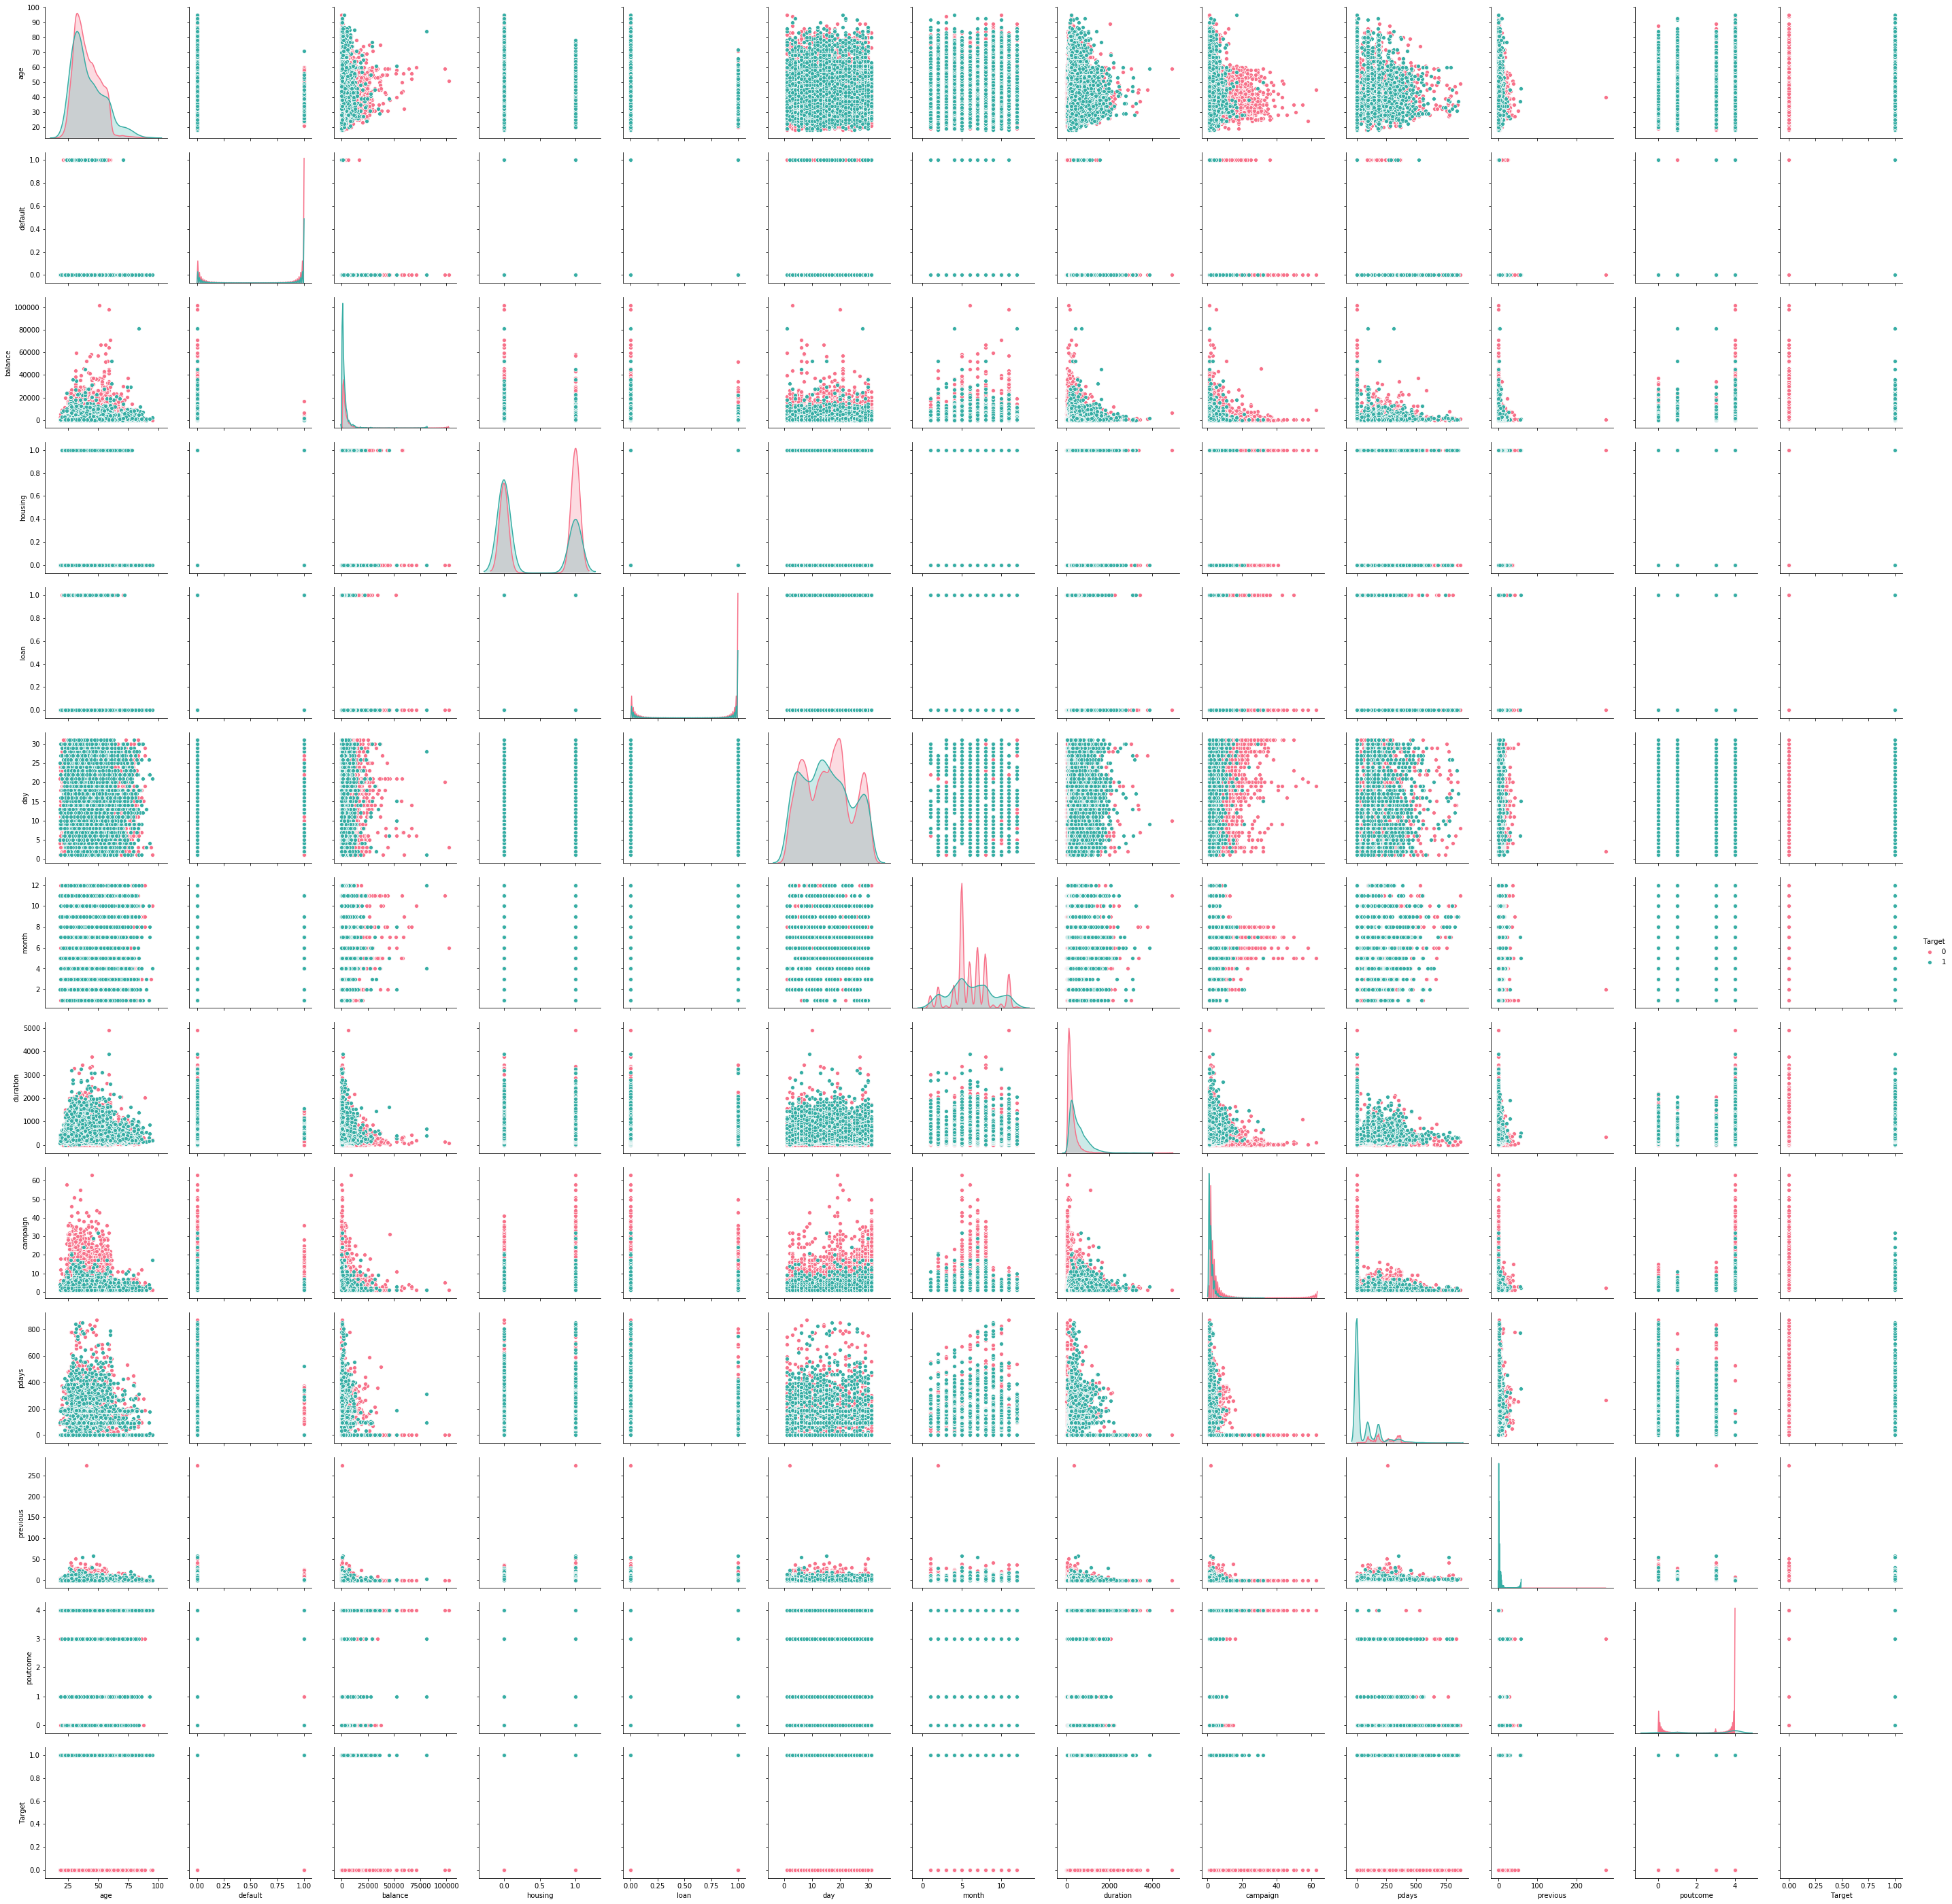

In [18]:
sns.pairplot(bank_data_model1,height=3,hue='Target',palette="husl");

In [19]:
bank_data_model1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1388.734069,3029.530442,0.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
month,45211.0,6.144655,2.408034,1.0,5.0,6.0,8.0,12.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,41.015195,99.792615,0.0,0.0,0.0,0.0,871.0


#### 3. outliers and strategy to remove

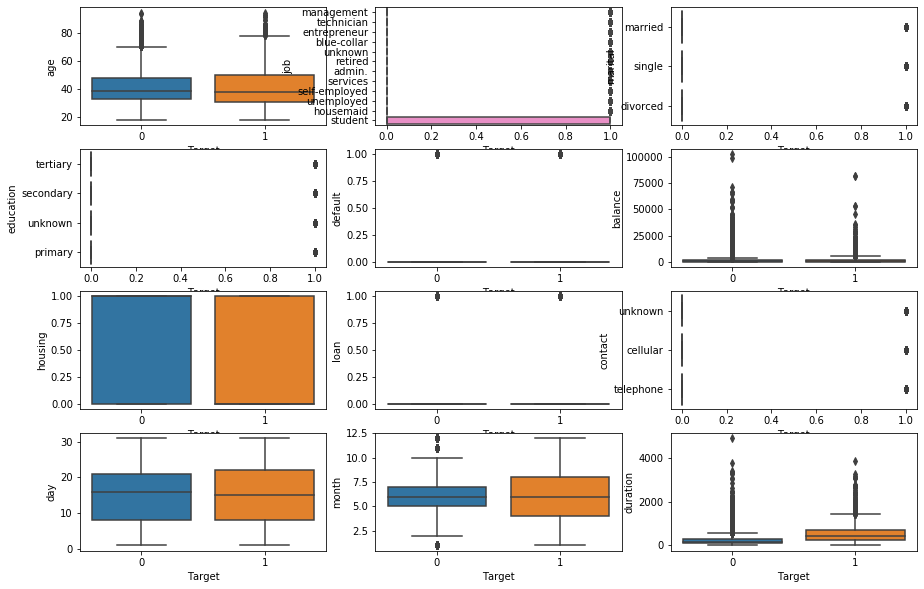

In [20]:
numerical=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome','Target']
f, ax = plt.subplots(4, 3, figsize=(15, 10))
f.tight_layout(pad=43.0)
for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x='Target', y=var, data=bank_data_model1, ax=subplot)

## Deliverable 2

#### 3. removing outliers - through log transformation

In [21]:
from sklearn.preprocessing import FunctionTransformer   

log_transformer = FunctionTransformer(np.log1p)

bank_data_model1['duration_log_transformed']=log_transformer.fit_transform(bank_data_model1[['duration']])

bank_data_model1['balance_log_transformed'] = log_transformer.fit_transform(bank_data_model1[['balance']])
bank_data_model1['campaign_log_transformed'] = log_transformer.fit_transform(bank_data_model1[['campaign']])
bank_data_model1['pdays_log_transformed'] = log_transformer.fit_transform(bank_data_model1[['pdays']])
bank_data_model1['previous_log_transformed'] =  log_transformer.fit_transform(bank_data_model1[['previous']])
bank_data_model1

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,Target,duration_log_transformed,balance_log_transformed,campaign_log_transformed,pdays_log_transformed,previous_log_transformed
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,1,0,0,4,0,5.568345,7.670429,0.693147,0.000000,0.000000
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,1,0,0,4,0,5.023881,3.401197,0.693147,0.000000,0.000000
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,1,0,0,4,0,4.343805,1.098612,0.693147,0.000000,0.000000
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,1,0,0,4,0,4.532599,7.317876,0.693147,0.000000,0.000000
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,1,0,0,4,0,5.293305,0.693147,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,...,3,0,0,4,1,6.885510,6.716595,1.386294,0.000000,0.000000
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,...,2,0,0,4,1,6.124683,7.455877,1.098612,0.000000,0.000000
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,...,5,184,3,1,1,7.028201,8.651025,1.791759,5.220356,1.386294
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,...,4,0,0,4,0,6.232448,6.505784,1.609438,0.000000,0.000000


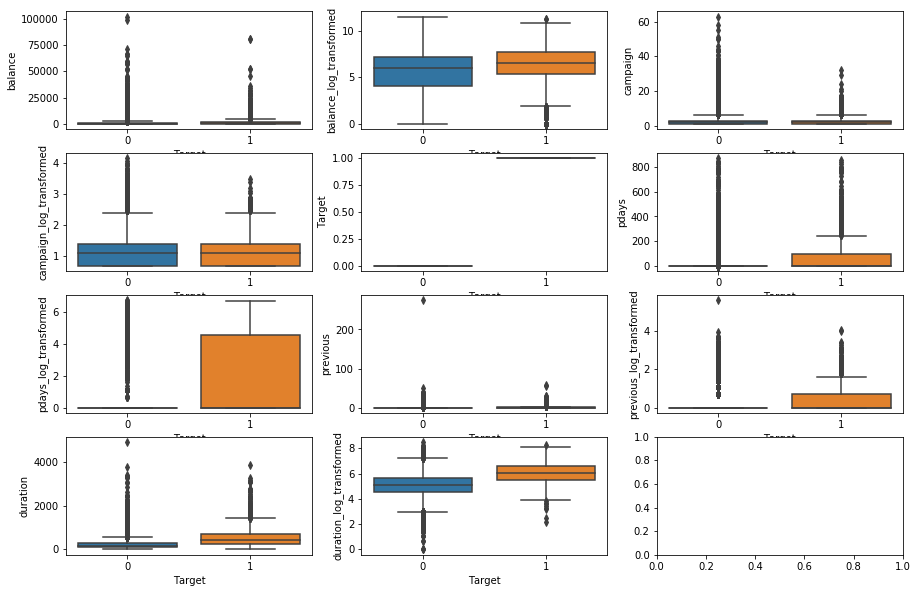

In [22]:
#a box plot for trnsformed and non-transformed features are plotted side by side to make the differnece apparent
numerical=['balance','balance_log_transformed','campaign','campaign_log_transformed',
        'Target', 'pdays',
       'pdays_log_transformed','previous',
       'previous_log_transformed','duration', 'duration_log_transformed']

f, ax = plt.subplots(4, 3, figsize=(15, 10))
f.tight_layout(pad=43.0)
for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x='Target', y=var, data=bank_data_model1, ax=subplot)



In [23]:
bank_data_model1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target', 'duration_log_transformed',
       'balance_log_transformed', 'campaign_log_transformed',
       'pdays_log_transformed', 'previous_log_transformed'],
      dtype='object')

#### 1. data frame load

In [24]:
# the other object variables need ot be treatd further
# bank_data_model1.drop(columns=['balance','pdays','previous','duration','campaign'],inplace=True)
bank_data_model=pd.get_dummies(bank_data_model1,columns=['job','marital','education','contact'],prefix=['Job','marital','edu','contact'],drop_first=True)
bank_data_model.head()
bank_data_model.columns
bank_data_model.rename(columns={'Job_admin.': 'Job_admin'}, inplace=True)
bank_data_model.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 36 columns):
age                         45211 non-null int64
default                     45211 non-null int64
balance                     45211 non-null int64
housing                     45211 non-null int64
loan                        45211 non-null int64
day                         45211 non-null int64
month                       45211 non-null int64
duration                    45211 non-null int64
campaign                    45211 non-null int64
pdays                       45211 non-null int64
previous                    45211 non-null int64
poutcome                    45211 non-null int64
Target                      45211 non-null int64
duration_log_transformed    45211 non-null float64
balance_log_transformed     45211 non-null float64
campaign_log_transformed    45211 non-null float64
pdays_log_transformed       45211 non-null float64
previous_log_transformed    45211 non-null float64

##### 2. Correct the attribute types

In [25]:
bank_data_model['Job_blue-collar'] = bank_data_model['Job_blue-collar'].astype('Int64')
bank_data_model['Job_entrepreneur'] = bank_data_model['Job_entrepreneur'].astype('Int64')
bank_data_model['Job_housemaid'] = bank_data_model['Job_housemaid'].astype('Int64')
bank_data_model['Job_management'] = bank_data_model['Job_management'].astype('Int64')
bank_data_model['Job_retired'] = bank_data_model['Job_retired'].astype('Int64')
bank_data_model['Job_self-employed'] = bank_data_model['Job_self-employed'].astype('Int64')
bank_data_model['Job_services'] = bank_data_model['Job_services'].astype('Int64')
bank_data_model['Job_student'] = bank_data_model['Job_student'].astype('Int64')
bank_data_model['Job_technician'] = bank_data_model['Job_technician'].astype('Int64')
bank_data_model['Job_unemployed'] = bank_data_model['Job_unemployed'].astype('Int64')
bank_data_model['Job_unknown'] = bank_data_model['Job_unknown'].astype('Int64')
bank_data_model['marital_married'] = bank_data_model['marital_married'].astype('Int64')
bank_data_model['marital_single'] = bank_data_model['marital_single'].astype('Int64')
bank_data_model['edu_secondary'] = bank_data_model['edu_secondary'].astype('Int64')
bank_data_model['edu_tertiary'] = bank_data_model['edu_tertiary'].astype('Int64')
bank_data_model['edu_unknown'] = bank_data_model['edu_unknown'].astype('Int64')
bank_data_model['contact_telephone'] = bank_data_model['contact_telephone'].astype('Int64')
bank_data_model['contact_unknown'] = bank_data_model['contact_unknown'].astype('Int64')
# bank_data_model.columns
bank_data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 36 columns):
age                         45211 non-null int64
default                     45211 non-null int64
balance                     45211 non-null int64
housing                     45211 non-null int64
loan                        45211 non-null int64
day                         45211 non-null int64
month                       45211 non-null int64
duration                    45211 non-null int64
campaign                    45211 non-null int64
pdays                       45211 non-null int64
previous                    45211 non-null int64
poutcome                    45211 non-null int64
Target                      45211 non-null int64
duration_log_transformed    45211 non-null float64
balance_log_transformed     45211 non-null float64
campaign_log_transformed    45211 non-null float64
pdays_log_transformed       45211 non-null float64
previous_log_transformed    45211 non-null float64

In [26]:
bank_data_model

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,Job_technician,Job_unemployed,Job_unknown,marital_married,marital_single,edu_secondary,edu_tertiary,edu_unknown,contact_telephone,contact_unknown
0,58,0,2143,1,0,5,5,261,1,0,...,0,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,5,5,151,1,0,...,1,0,0,0,1,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,0,...,0,0,0,1,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,0,...,0,0,0,1,0,0,0,1,0,1
4,33,0,1,0,0,5,5,198,1,0,...,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,0,...,1,0,0,1,0,0,1,0,0,0
45207,71,0,1729,0,0,17,11,456,2,0,...,0,0,0,0,0,0,0,0,0,0
45208,72,0,5715,0,0,17,11,1127,5,184,...,0,0,0,1,0,1,0,0,0,0
45209,57,0,668,0,0,17,11,508,4,0,...,0,0,0,1,0,1,0,0,1,0


#### 4. split data as train/test

In [27]:
from sklearn.model_selection import train_test_split

features = [col for col in bank_data_model.columns if col != 'Target']


X_train,X_test,y_train,y_test = train_test_split(bank_data_model[features],bank_data_model['Target'],test_size=0.30,random_state=7)
X_train,
y_train

35272    0
10705    0
43536    1
6960     0
41892    0
        ..
34140    0
13927    1
919      0
38467    0
10742    0
Name: Target, Length: 31647, dtype: int64

## Deliverable 3

#### 1. Train and test the dataset with standard algorithm

In [28]:
# use DecisionTreeClassifier with 'entropy' criterion
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)
print("Train : %0.2f" % model_entropy.score(X_train,y_train))
print("Test : %0.2f" %model_entropy.score (X_test,y_test))


Train : 1.00
Test : 0.88


In [29]:
# # use DecisionTreeClassifier with 'gini' criterion 
model_gini = DecisionTreeClassifier(criterion='gini')
model_gini.fit(X_train, y_train)
print("Train : %0.2f" % model_gini.score(X_train,y_train))
print("Test : %0.2f" %model_gini.score (X_test,y_test))

Train : 1.00
Test : 0.88


In [30]:
# This is for later use to pass in for loops as a base model to other classifiers
models= []
models.append(model_gini)
models.append(model_entropy)


In [31]:
# create a function for score matrix
def score_comparison_matrix(model_param,X_train,y_train,X_test,y_test):
    preds_train = model_param.predict(X_train)
    preds_test = model_param.predict(X_test)
    acc_res = accuracy_score(y_test, preds_test)
    roc_auc=roc_auc_score(y_test,preds_test)
    model_score_train=model_param.score(X_train,y_train)
    model_score_test=model_param.score(X_test,y_test)
    result=(acc_res,roc_auc,model_score_train,model_score_test)
    return result


In [32]:
# Creating a function for visualizing classifier results and curves
from yellowbrick.classifier import ClassificationReport, ROCAUC
def visClassifierResults(model_w_parameters):
    viz = ClassificationReport(model_w_parameters)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()

    roc = ROCAUC(model_w_parameters)
    roc.fit(X_train, y_train)
    roc.score(X_test, y_test)
    roc.show()

In [33]:
# function to draw confusion matrix in a good format
annot_kws={'fontsize':10, 
           'fontstyle':'italic',  
           'color':"k",
           'alpha':0.9, 
           'rotation':"horizontal",
           'horizontalalignment':'center',
           'verticalalignment':'center',
           'backgroundcolor':'w'}
def draw_confusion_m(actual,predicted):
    plt.figure(figsize=(7,5))
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,fmt='0',linewidths=.8,annot_kws=annot_kws);
    
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

#### 2. Model Performance

In [34]:
result = score_comparison_matrix(model_entropy,X_train,y_train,X_test,y_test)
results_df=pd.DataFrame({'Method': ['Decision Tree-Entropy'],'accuracy': [result[0]],'roc_auc':[result[1]],'train_score':[result[2]],'test_score':[result[3]]})
results_df #put the accuracy results inside a df to create amatrix for comaprison

,Method,accuracy,roc_auc,train_score,test_score
0,Decision Tree-Entropy,0.877396,0.70366,1.0,0.877396


In [35]:
result = score_comparison_matrix(model_gini,X_train,y_train,X_test,y_test)
print(result[0],result[1])
tempResultsDF1=pd.DataFrame({'Method': ['Decision Tree-Gini'],'accuracy': [result[0]],'roc_auc':[result[1]],'train_score':[result[2]],'test_score':[result[3]]})
results_df=pd.concat([results_df,tempResultsDF1])
results_df = results_df[['Method', 'accuracy','roc_auc','train_score','test_score']]
results_df #put the accuracy results inside a df to create amatrix for comaprison

0.8768799764081392 0.7013779111543176


,Method,accuracy,roc_auc,train_score,test_score
0,Decision Tree-Entropy,0.877396,0.703660,1.0,0.877396
0,Decision Tree-Gini,0.876880,0.701378,1.0,0.876880


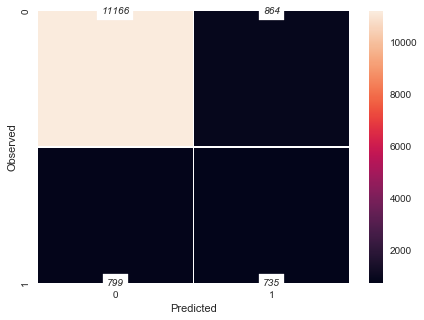

In [36]:
# confusion matrix
draw_confusion_m(y_test,model_entropy.predict(X_test))

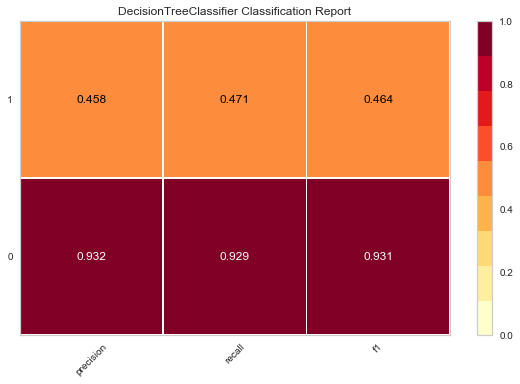

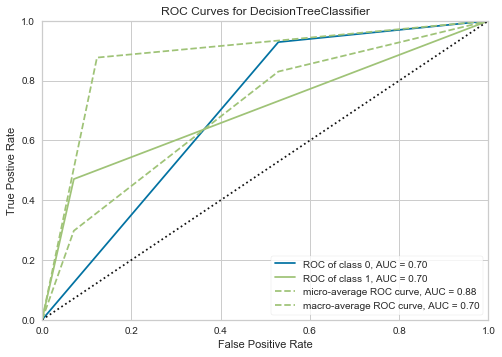

In [37]:
visClassifierResults(DecisionTreeClassifier( criterion='gini',random_state=22))

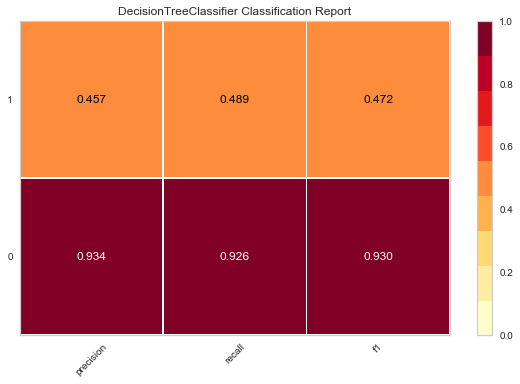

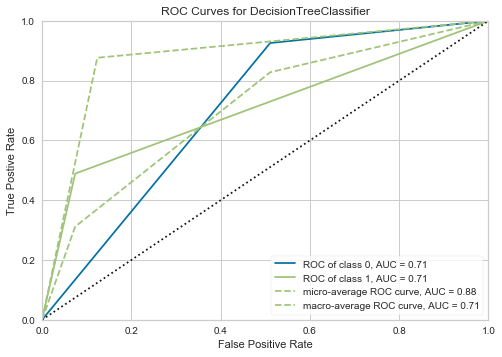

In [38]:
visClassifierResults(DecisionTreeClassifier( criterion='entropy',random_state=22))

###### Regularize/pruning

In [39]:
classf_pruned = DecisionTreeClassifier(
    criterion="entropy", 
    random_state=56,
    max_depth=6, 
    min_samples_leaf=3
)

classf_pruned.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=56, splitter='best')

In [40]:
result = score_comparison_matrix(classf_pruned,X_train,y_train,X_test,y_test)
tempResultsDF2=pd.DataFrame({'Method': ['Decision Tree-Pruned'],'accuracy': [result[0]],'roc_auc':[result[1]],'train_score':[result[2]],'test_score':[result[3]]})
results_df=pd.concat([results_df,tempResultsDF2])
results_df = results_df[['Method', 'accuracy','roc_auc','train_score','test_score']]
results_df 

,Method,accuracy,roc_auc,train_score,test_score
0,Decision Tree-Entropy,0.877396,0.703660,1.000000,0.877396
0,Decision Tree-Gini,0.876880,0.701378,1.000000,0.876880
0,Decision Tree-Pruned,0.901725,0.678130,0.903245,0.901725


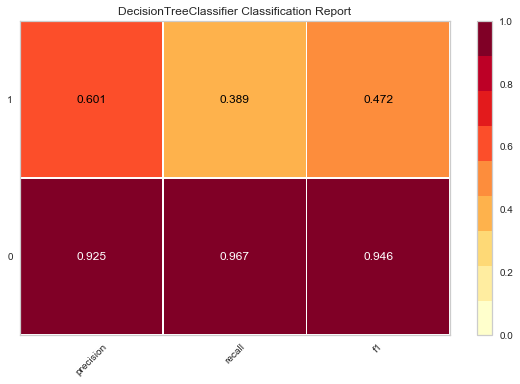

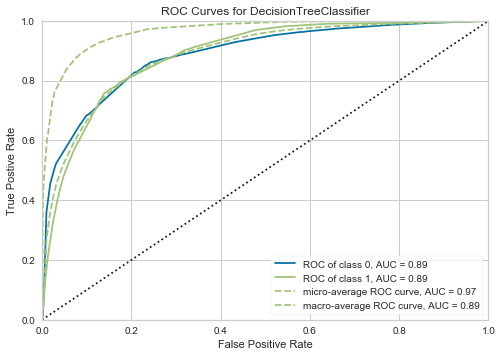

In [41]:
# classification report for pruned model
visClassifierResults(DecisionTreeClassifier( criterion="entropy", 
    random_state=56,
    max_depth=6, 
    min_samples_leaf=3))

In [42]:
#add pruned model to models list for later use
models.append(classf_pruned)

In [43]:
# feature importance

In [44]:
## Calculating feature importance

feat_importance = classf_pruned.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(features, classf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration_log_transformed,0.394561
pdays,0.120116
month,0.105233
duration,0.104511
housing,0.104115
contact_unknown,0.086013
poutcome,0.051324
pdays_log_transformed,0.014635
age,0.007344
day,0.003515


#### 3,4,5 and 6. Models comparison

######  Ensemble - RandomForest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_depth=6,min_samples_split=6,min_samples_leaf=3)
rfcl =rfcl.fit(X_train,y_train)


In [46]:
result = score_comparison_matrix(classf_pruned,X_train,y_train,X_test,y_test)
tempResultsDF3=pd.DataFrame({'Method': ['Random Forest Classifier'],'accuracy': [result[0]],'roc_auc':[result[1]],'train_score':[result[2]],'test_score':[result[3]]})
results_df=pd.concat([results_df,tempResultsDF3])
results_df = results_df[['Method', 'accuracy','roc_auc','train_score','test_score']]
results_df 

,Method,accuracy,roc_auc,train_score,test_score
0,Decision Tree-Entropy,0.877396,0.703660,1.000000,0.877396
0,Decision Tree-Gini,0.876880,0.701378,1.000000,0.876880
0,Decision Tree-Pruned,0.901725,0.678130,0.903245,0.901725
0,Random Forest Classifier,0.901725,0.678130,0.903245,0.901725


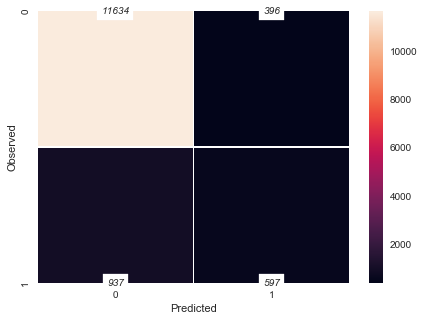

In [47]:
draw_confusion_m(y_test,classf_pruned.predict(X_test))

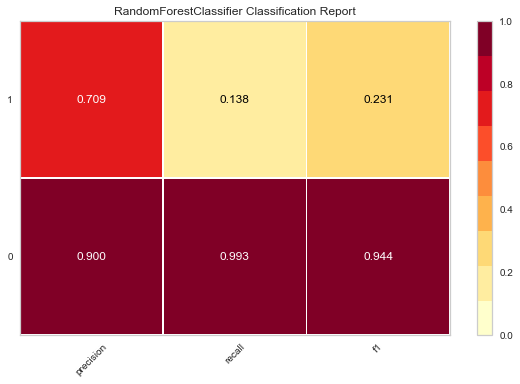

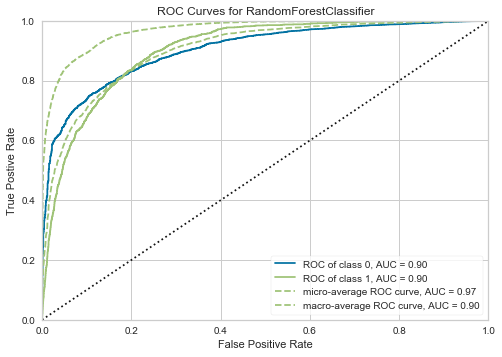

In [48]:
# Visualize model performance with yellowbrick library
visClassifierResults(RandomForestClassifier( n_estimators = 100,max_depth=6,min_samples_split=6,min_samples_leaf=3))


#### Ensemble -Adaboost

In [49]:
from sklearn.ensemble import AdaBoostClassifier
ada_clfr = AdaBoostClassifier(n_estimators = 100,learning_rate=0.6,random_state=22)
ada_clfr = ada_clfr.fit(X_train,y_train)

In [50]:
result = score_comparison_matrix(ada_clfr,X_train,y_train,X_test,y_test)
tempResultsDF4=pd.DataFrame({'Method': ['Adaboost Classifier'],'accuracy': [result[0]],'roc_auc':[result[1]],'train_score':[result[2]],'test_score':[result[3]]})
results_df=pd.concat([results_df,tempResultsDF4])
results_df = results_df[['Method', 'accuracy','roc_auc','train_score','test_score']]
results_df 


,Method,accuracy,roc_auc,train_score,test_score
0,Decision Tree-Entropy,0.877396,0.703660,1.000000,0.877396
0,Decision Tree-Gini,0.876880,0.701378,1.000000,0.876880
0,Decision Tree-Pruned,0.901725,0.678130,0.903245,0.901725
0,Random Forest Classifier,0.901725,0.678130,0.903245,0.901725
0,Adaboost Classifier,0.901283,0.656552,0.898316,0.901283


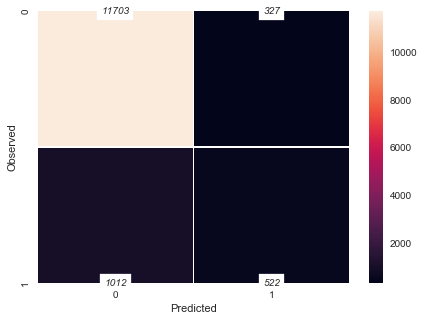

In [51]:
draw_confusion_m(y_test,ada_clfr.predict(X_test))
# the confusionmatrix says the model did a good job in predicting true negatives and poor in true positives.

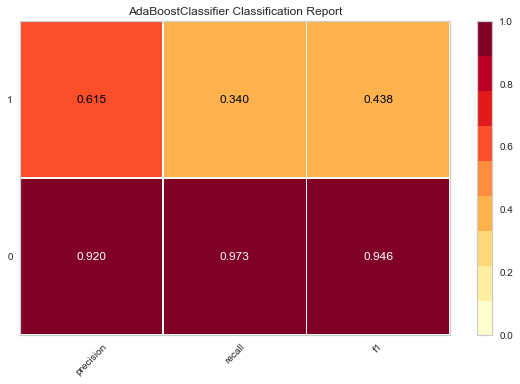

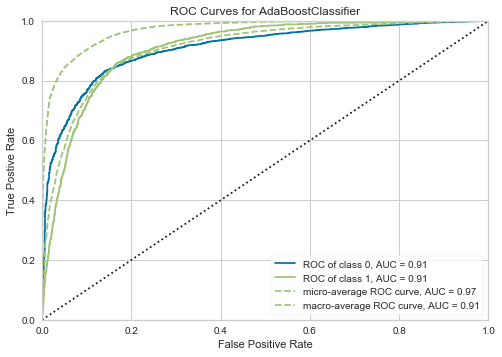

In [52]:
# Visualize model performance with yellowbrick library
visClassifierResults(AdaBoostClassifier(n_estimators = 100,learning_rate=0.6))


#### Ensemble - Bagging classifier

In [53]:
# This is to use the base model and use their subsets to come up with maximum votes from the subsets. Since it is using subsets overfitting is minimal
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier(n_estimators = 100,max_samples=0.04,bootstrap=True,oob_score=True,random_state=22)
bgcl=bgcl.fit(X_train,y_train)


In [54]:
result = score_comparison_matrix(bgcl,X_train,y_train,X_test,y_test)
tempResultsDF5=pd.DataFrame({'Method': ['Bagging Classifier'],'accuracy': [result[0]],'roc_auc':[result[1]],'train_score':[result[2]],'test_score':[result[3]]})
results_df=pd.concat([results_df,tempResultsDF5])
results_df = results_df[['Method', 'accuracy','roc_auc','train_score','test_score']]
results_df 

,Method,accuracy,roc_auc,train_score,test_score
0,Decision Tree-Entropy,0.877396,0.703660,1.000000,0.877396
0,Decision Tree-Gini,0.876880,0.701378,1.000000,0.876880
0,Decision Tree-Pruned,0.901725,0.678130,0.903245,0.901725
0,Random Forest Classifier,0.901725,0.678130,0.903245,0.901725
0,Adaboost Classifier,0.901283,0.656552,0.898316,0.901283
0,Bagging Classifier,0.905338,0.673626,0.907574,0.905338


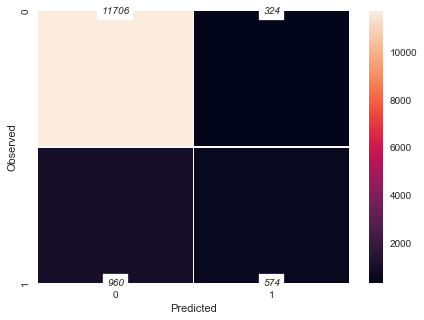

In [55]:
draw_confusion_m(y_test,bgcl.predict(X_test))
# the confusionmatrix says the model did a good job in predicting true negatives and poor in true positives.

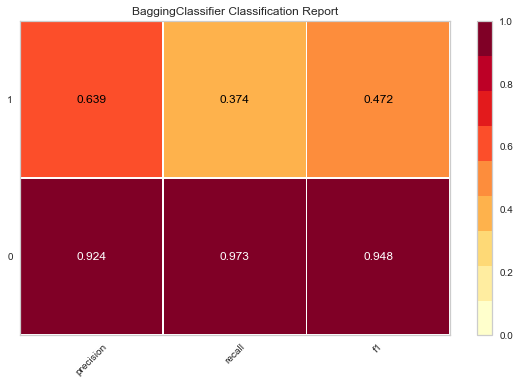

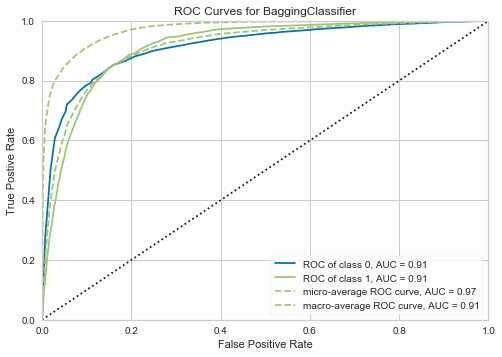

In [56]:
# Visualize model performance with yellowbrick library
visClassifierResults(BaggingClassifier(n_estimators = 100,max_samples=0.04, bootstrap=True, oob_score=True, random_state=22))


#### Ensemble - Gradient Boost

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.3, random_state=25,loss='exponential')
gbcl = gbcl.fit(X_train, y_train)


In [58]:
result = score_comparison_matrix(gbcl,X_train,y_train,X_test,y_test)
tempResultsDF6=pd.DataFrame({'Method': ['Gradient Boost Classifier'],'accuracy': [result[0]],'roc_auc':[result[1]],'train_score':[result[2]],'test_score':[result[3]]})
results_df=pd.concat([results_df,tempResultsDF6])
results_df = results_df[['Method', 'accuracy','roc_auc','train_score','test_score']]


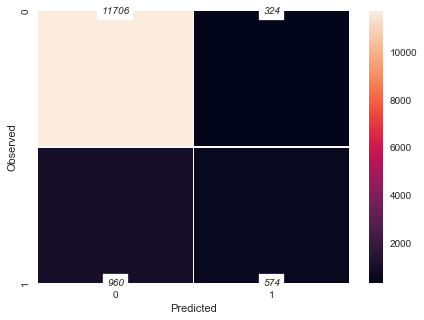

In [59]:
draw_confusion_m(y_test,bgcl.predict(X_test))

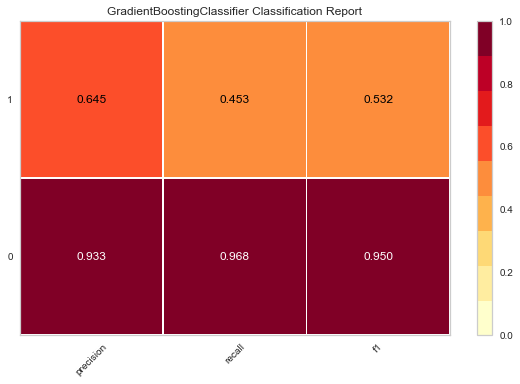

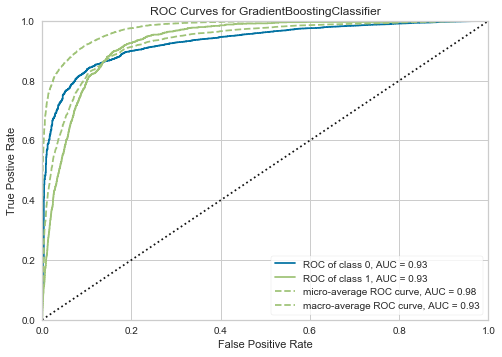

In [60]:
visClassifierResults(GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.3, random_state=22))

In [61]:
results_df 

,Method,accuracy,roc_auc,train_score,test_score
0,Decision Tree-Entropy,0.877396,0.703660,1.000000,0.877396
0,Decision Tree-Gini,0.876880,0.701378,1.000000,0.876880
0,Decision Tree-Pruned,0.901725,0.678130,0.903245,0.901725
0,Random Forest Classifier,0.901725,0.678130,0.903245,0.901725
0,Adaboost Classifier,0.901283,0.656552,0.898316,0.901283
0,Bagging Classifier,0.905338,0.673626,0.907574,0.905338
0,Gradient Boost Classifier,0.911383,0.716564,0.914684,0.911383


## Deliverable 4 - Hyper parameter selections

##### Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
estimators= [100, 300, 500, 800, 1200]
max_features=[2,6,8,10]
loss_parameter =['deviance', 'exponential']
learn_rate =[0.001,0.005,0.2,0.3,0.4,0.6]
acc_res_GB_df= pd.DataFrame()
accuracy_comparison_GB_df_t=pd.DataFrame()
for i in loss_parameter:
    for est in estimators:
        for j in max_features:
            for k in learn_rate:
                gbcl_t = GradientBoostingClassifier(max_features=j,n_estimators = est,loss=[i], learning_rate = k, random_state=50)
                gbcl_t = gbcl.fit(X_train, y_train)
                pred_GB_t = gbcl_t.predict(X_test)
                acc_GB_t = accuracy_score(y_test, pred_GB_t)
                accuracy_comparison_GB_df_t= pd.DataFrame({'loss_parameter':[i],'max_features':[j],'learn_rate':[k],'estimators': [est],'accuracy': [acc_GB_t],'roc_auc':roc_auc_score(y_test, pred_GB_t),'train_score':gbcl_t.score(X_train,y_train),'test_score':gbcl_t.score(X_test,y_test),'diff_train_test':(gbcl_t.score(X_train,y_train)-gbcl_t.score(X_test,y_test))})
                acc_res_GB_df=pd.concat([acc_res_GB_df,accuracy_comparison_GB_df_t]) # the new accuracy score is added to the results df
                acc_res_GB_df= acc_res_GB_df[['loss_parameter','max_features','learn_rate','estimators','accuracy','roc_auc','train_score','test_score','diff_train_test']]
acc_res_GB_df.dropna(inplace=True)
print(acc_res_GB_df.to_csv('gradient_boost_classifier_results_comparison_for_parameters.csv'))
print('-----------------inference for GradientBoostClassifier-----------------------')
acc_res_GB_df.nsmallest(10,['diff_train_test'])

None
-----------------inference for GradientBoostClassifier-----------------------


,loss_parameter,max_features,learn_rate,estimators,accuracy,roc_auc,train_score,test_score,diff_train_test
0,deviance,2,0.001,100,0.911383,0.716564,0.914684,0.911383,0.003301
0,deviance,2,0.005,100,0.911383,0.716564,0.914684,0.911383,0.003301
0,deviance,2,0.200,100,0.911383,0.716564,0.914684,0.911383,0.003301
0,deviance,2,0.300,100,0.911383,0.716564,0.914684,0.911383,0.003301
0,deviance,2,0.400,100,0.911383,0.716564,0.914684,0.911383,0.003301
0,deviance,2,0.600,100,0.911383,0.716564,0.914684,0.911383,0.003301
0,deviance,6,0.001,100,0.911383,0.716564,0.914684,0.911383,0.003301
0,deviance,6,0.005,100,0.911383,0.716564,0.914684,0.911383,0.003301
0,deviance,6,0.200,100,0.911383,0.716564,0.914684,0.911383,0.003301
0,deviance,6,0.300,100,0.911383,0.716564,0.914684,0.911383,0.003301


### Sections below are just to see how results look like upon hyper-parameter tuning on other algorithms.  ******computational intensive and run with caution. Results are displayed************

#### RandomForest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

estimators= [100, 300, 500, 800, 1200]
criteria =['gini','entropy']
max_features=['log2', 'sqrt', 'auto', 'None']
min_samples_leaf=[1,2,5,10]
acc_rf_res_df= pd.DataFrame()

for cr in criteria:
    for est in estimators:
        for i in max_features:
            for j in min_samples_leaf:
                rfcl_t = RandomForestClassifier(n_estimators = est,criterion=cr,max_depth=6,min_samples_split=6,min_samples_leaf=j,max_features=i,oob_score=True,bootstrap=True)
                rfcl_t =rfcl.fit(X_train,y_train)
                pred_rf_t = rfcl.predict(X_test)
                acc_rf_t= accuracy_score(y_test,pred_rf_t)
                accuracy_comparison_rf_df= pd.DataFrame({'min_samples_leaf':[j],'max_features':[i],'criterion':[cr],'estimators': [est],'accuracy': [acc_rf_t],'roc_auc':roc_auc_score(y_test,pred_rf_t),'train_score':rfcl_t.score(X_train,y_train),'test_score':rfcl_t.score(X_test,y_test),'diff_train_test':rfcl_t.score(X_train,y_train)-rfcl_t.score(X_test,y_test)})
                acc_rf_res_df=pd.concat([acc_rf_res_df,accuracy_comparison_rf_df]) # the new accuracy score is added to the results df
                acc_rf_res_df= acc_rf_res_df[['min_samples_leaf','max_features','criterion','estimators','accuracy','roc_auc','train_score','test_score','diff_train_test']]
acc_rf_res_df.dropna(inplace=True)
acc_rf_res_df.to_csv('randomforest_classification_results_comparison_for_parameters.csv')
acc_rf_res_df.nsmallest(10,'diff_train_test')


,min_samples_leaf,max_features,criterion,estimators,accuracy,roc_auc,train_score,test_score,diff_train_test
0,10,None,entropy,800,0.894279,0.545107,0.891491,0.894279,-0.002788
0,10,None,gini,800,0.895090,0.549262,0.892533,0.895090,-0.002557
0,2,sqrt,entropy,100,0.895680,0.554713,0.893228,0.895680,-0.002451
0,2,sqrt,entropy,800,0.894353,0.548562,0.891933,0.894353,-0.002420
0,1,sqrt,gini,500,0.894721,0.548769,0.892344,0.894721,-0.002378
0,2,None,entropy,800,0.894648,0.549581,0.892280,0.894648,-0.002367
0,5,log2,gini,1200,0.894721,0.551329,0.892407,0.894721,-0.002314
0,10,auto,gini,500,0.894942,0.550316,0.892660,0.894942,-0.002283
0,5,log2,entropy,100,0.894942,0.551453,0.892660,0.894942,-0.002283
0,10,None,entropy,100,0.894205,0.546203,0.891933,0.894205,-0.002272


#### BaggingClassifier

In [68]:
#This is to use the base model ( used both gini and entropy) and use their subsets to come up 
# with maximum votes from the subsets
from sklearn.ensemble import BaggingClassifier

estimators= [100, 300, 500, 800, 1200]
mdl=[models[0],models[1]] # base models inside a list to pass on to the loop 
max_features=[2,6,8,10]
acc_res_bg_df= pd.DataFrame()
accuracy_comparison_bg_df =pd.DataFrame()
for i in mdl:
    for est in estimators:
        for j in max_features:
            bgcl=BaggingClassifier(base_estimator=i,n_estimators = est,max_samples=.7,bootstrap=True,oob_score=True,random_state=23,max_features=j)
            bgcl=bgcl.fit(X_train,y_train)
            pred_bg=bgcl.predict(X_test)
            acc_bg=accuracy_score(y_test,pred_bg)
            accuracy_comparison_bg_df= pd.DataFrame({'max_features':[j],'base_model':[i],'estimators': [est],'accuracy': [acc_bg],'roc_auc':roc_auc_score(y_test, pred_bg),'train_score':rfcl.score(X_train,y_train),'test_score':rfcl.score(X_test,y_test),'diff_train_test':rfcl.score(X_train,y_train)-rfcl.score(X_test,y_test)})
            acc_res_bg_df=pd.concat([acc_res_bg_df,accuracy_comparison_bg_df]) # the new accuracy score is added to the results df
            acc_res_bg_df= acc_res_bg_df[['max_features','base_model','estimators','accuracy','roc_auc','train_score','test_score','diff_train_test']]
acc_res_bg_df.dropna(inplace=True)
acc_res_bg_df.to_csv('baggingclassifier.csv')
print('-----------------inference for BaggingClassifier-----------------------')
acc_res_bg_df.nsmallest(10,['diff_train_test'])


-----------------inference for BaggingClassifier-----------------------


,max_features,base_model,estimators,accuracy,roc_auc,train_score,test_score,diff_train_test
0,2,"DecisionTreeClassifier(class_weight=None, crit...",100,0.886907,0.500000,0.892628,0.894795,-0.002167
0,6,"DecisionTreeClassifier(class_weight=None, crit...",100,0.889929,0.516208,0.892628,0.894795,-0.002167
0,8,"DecisionTreeClassifier(class_weight=None, crit...",100,0.892436,0.531555,0.892628,0.894795,-0.002167
0,10,"DecisionTreeClassifier(class_weight=None, crit...",100,0.894869,0.547999,0.892628,0.894795,-0.002167
0,2,"DecisionTreeClassifier(class_weight=None, crit...",300,0.886907,0.500000,0.892628,0.894795,-0.002167
0,6,"DecisionTreeClassifier(class_weight=None, crit...",300,0.889339,0.513600,0.892628,0.894795,-0.002167
0,8,"DecisionTreeClassifier(class_weight=None, crit...",300,0.893468,0.537256,0.892628,0.894795,-0.002167
0,10,"DecisionTreeClassifier(class_weight=None, crit...",300,0.895680,0.551016,0.892628,0.894795,-0.002167
0,2,"DecisionTreeClassifier(class_weight=None, crit...",500,0.886907,0.500000,0.892628,0.894795,-0.002167
0,6,"DecisionTreeClassifier(class_weight=None, crit...",500,0.888750,0.509855,0.892628,0.894795,-0.002167


In [69]:
# very slight change in the result for bagging classifier and does not beat gradientboost

In [70]:
from sklearn.ensemble import AdaBoostClassifier
estimators= [20,60,80,100]
max_features=[2,6,8,10]
learn_rate =[0.001,0.005,0.2,0.4,0.6,0.8]
# base_estimator is used as pruned model which is models[2]
acc_res_ada_df=pd.DataFrame()
for est in estimators:
    for i in learn_rate:
        ada_t = AdaBoostClassifier(base_estimator = models[2],n_estimators = est,learning_rate=i,random_state=25)
        ada_t = ada_t.fit(X_train,y_train)
        pred_ada_t=ada_t.predict(X_test)
        acc_ada_t=accuracy_score(y_test,pred_ada_t )
        accuracy_comparison_ada_df_t= pd.DataFrame({'base_estimator':models[2],'max_features':[j],'estimators': [est],'learn_rate':[i],'accuracy': [acc_ada_t],'roc_auc':roc_auc_score(y_test, pred_ada_t),'train_score':ada_t.score(X_train,y_train),'test_score':ada_t.score(X_test,y_test),'diff_train_test':(ada_t.score(X_train,y_train)-ada_t.score(X_test,y_test))})
        acc_res_ada_df=pd.concat([acc_res_ada_df,accuracy_comparison_ada_df_t]) # the new accuracy score is added to the results df
        acc_res_ada_df= acc_res_ada_df[['base_estimator','max_features','estimators','learn_rate','accuracy','roc_auc','train_score','test_score','diff_train_test']]
acc_res_ada_df.dropna(inplace=True)
print(acc_res_ada_df.to_csv('ada_boost_classifier_results_comparison_for_parameters.csv'))
acc_res_ada_df.nsmallest(10,['diff_train_test'])


None


,base_estimator,max_features,estimators,learn_rate,accuracy,roc_auc,train_score,test_score,diff_train_test
0,"DecisionTreeClassifier(class_weight=None, crit...",10,80,0.001,0.901283,0.659396,0.901065,0.901283,-0.000218
0,"DecisionTreeClassifier(class_weight=None, crit...",10,20,0.001,0.900988,0.653827,0.900907,0.900988,-0.000081
0,"DecisionTreeClassifier(class_weight=None, crit...",10,60,0.001,0.901135,0.657607,0.901349,0.901135,0.000214
0,"DecisionTreeClassifier(class_weight=None, crit...",10,20,0.005,0.902315,0.665666,0.902676,0.902315,0.000361
0,"DecisionTreeClassifier(class_weight=None, crit...",10,100,0.001,0.901799,0.663100,0.902234,0.901799,0.000435
0,"DecisionTreeClassifier(class_weight=None, crit...",10,60,0.005,0.902315,0.661400,0.905173,0.902315,0.002858
0,"DecisionTreeClassifier(class_weight=None, crit...",10,80,0.005,0.902978,0.662627,0.905836,0.902978,0.002858
0,"DecisionTreeClassifier(class_weight=None, crit...",10,100,0.005,0.902389,0.662010,0.906974,0.902389,0.004585
0,"DecisionTreeClassifier(class_weight=None, crit...",10,20,0.200,0.907844,0.700634,0.926691,0.907844,0.018847
0,"DecisionTreeClassifier(class_weight=None, crit...",10,20,0.400,0.903937,0.704972,0.932695,0.903937,0.028758


In [ ]:
# again for ada boost the result table shows the first most promising parameters. But did not beat Gradient Boost classiifer where accuracy,roc_auc and train//test scores are better.